# Clustering
The dating profiles

### Importing Libraries and Data

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Loading in the cleaned DF
with open("../Data-Gathering-Creation/profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,8,1,2,8,4,7,5
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,2,1,1,4,5,1,3
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,8,2,0,8,7,8,1
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,7,3,8,6,2,4,1
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,2,9,2,2,8,8,8
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,5,8,8,0,8,0,0
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9,2,2,8,2,3,2
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,6,3,2,8,6,5,8
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,8,6,5,3,4,9,4


## Scaling the Categories

In [5]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,0.888889,0.111111,0.222222,0.888889,0.444444,0.777778,0.555556
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,0.222222,0.111111,0.111111,0.444444,0.555556,0.111111,0.333333
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,0.888889,0.222222,0.000000,0.888889,0.777778,0.888889,0.111111
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,0.777778,0.333333,0.888889,0.666667,0.222222,0.444444,0.111111
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,0.222222,1.000000,0.222222,0.222222,0.888889,0.888889,0.888889
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,0.555556,0.888889,0.888889,0.000000,0.888889,0.000000,0.000000
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,1.000000,0.222222,0.222222,0.888889,0.222222,0.333333,0.222222
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,0.666667,0.333333,0.222222,0.888889,0.666667,0.555556,0.888889
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,0.888889,0.666667,0.555556,0.333333,0.444444,1.000000,0.444444


## Vectorizing the Bios

In [6]:
# Instantiating the Vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [7]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.000000,0.000000,0.000000,0.0,0.000000,0.299516,0.0,0.0,0.298450,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.214134,0.0,0.000000,0.277054,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.227873,0.000000,0.000000,0.0,0.262858,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.189942,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.237262,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.312052,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.287760,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.284670,0.207936,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,0.000000,0.260724,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.300229,0.0,...,0.0,0.000000,0.000000,0.223722,0.0,0.0,0.0,0.0,0.0,0.0
6236,0.238442,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.266720,0.0,...,0.0,0.000000,0.000000,0.198752,0.0,0.0,0.0,0.0,0.0,0.0
6237,0.282283,0.000000,0.244922,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.340625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6238,0.246100,0.239063,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.280836,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.888889,0.111111,0.222222,0.888889,0.444444,0.777778,0.555556,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.222222,0.111111,0.111111,0.444444,0.555556,0.111111,0.333333,0.000000,0.000000,0.214134,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.888889,0.222222,0.000000,0.888889,0.777778,0.888889,0.111111,0.227873,0.000000,0.000000,...,0.0,0.000000,0.000000,0.189942,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,0.333333,0.888889,0.666667,0.222222,0.444444,0.111111,0.000000,0.000000,0.237262,...,0.0,0.000000,0.312052,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.222222,1.000000,0.222222,0.222222,0.888889,0.888889,0.888889,0.000000,0.000000,0.000000,...,0.0,0.000000,0.284670,0.207936,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,0.555556,0.888889,0.888889,0.000000,0.888889,0.000000,0.000000,0.000000,0.260724,0.000000,...,0.0,0.000000,0.000000,0.223722,0.0,0.0,0.0,0.0,0.0,0.0
6236,1.000000,0.222222,0.222222,0.888889,0.222222,0.333333,0.222222,0.238442,0.000000,0.000000,...,0.0,0.000000,0.000000,0.198752,0.0,0.0,0.0,0.0,0.0,0.0
6237,0.666667,0.333333,0.222222,0.888889,0.666667,0.555556,0.888889,0.282283,0.000000,0.244922,...,0.0,0.340625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6238,0.888889,0.666667,0.555556,0.333333,0.444444,1.000000,0.444444,0.246100,0.239063,0.000000,...,0.0,0.000000,0.280836,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

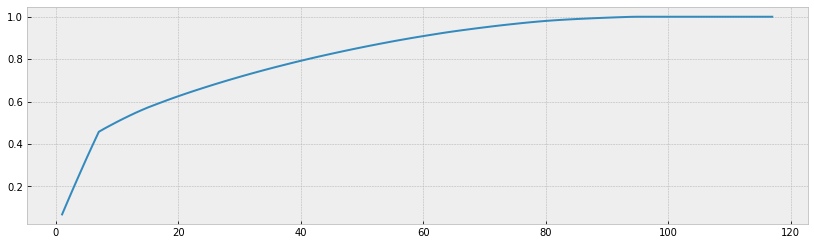

Number features: 85
Total Variance Explained: 0.9905871473011442


In [9]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [10]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9891971485327342

# Hierarchical Agglomerative Clustering

Running HAC initially with the PCA DF to test it out

In [11]:
# Instantiating KMeans
hac = AgglomerativeClustering(n_clusters=4)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Setting an evaluation score or metric
print(calinski_harabasz_score(df_pca, cluster_assignments))

64.33836648810933


### Finding the Optimum Number of Clusters

In [12]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

## Plotting the Evaluation Scores for Different Evaluation Metrics

In [13]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric
    """
    
    plt.figure(figsize=(14,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

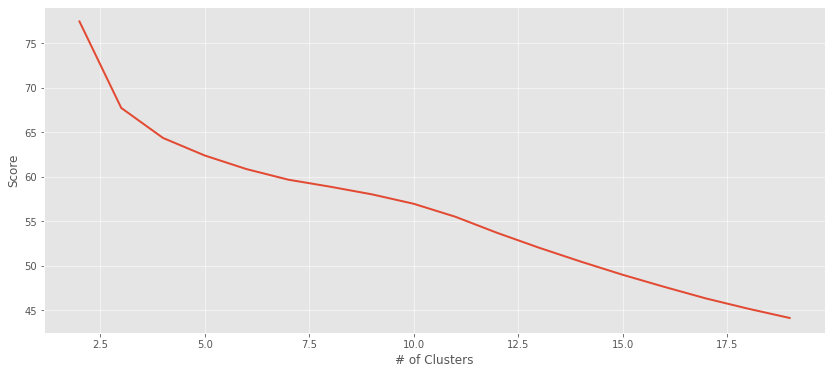

In [14]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

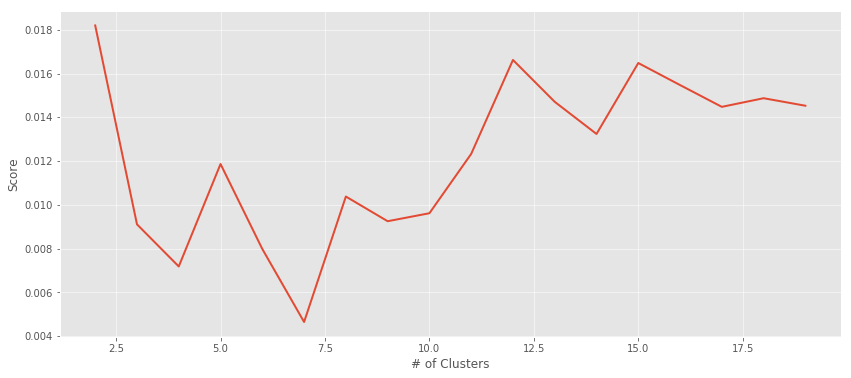

In [13]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

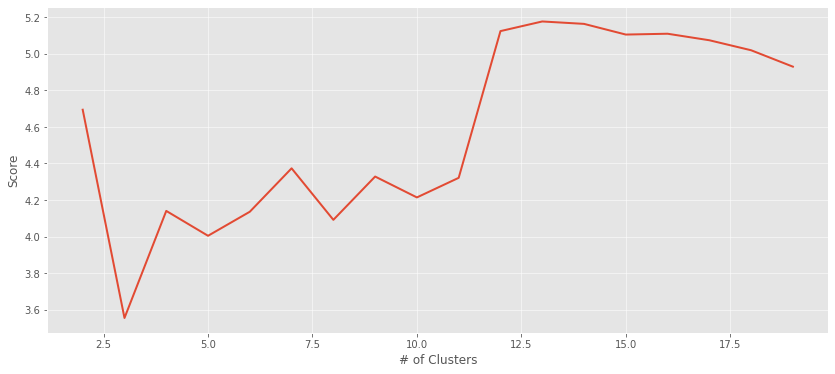

In [16]:
plot_evaluation(db_scores)